# 2.1 Schemat uczenia drzewa

### Klasyfikacja punktów z dwóch okręgów
Skorzystamy z generatora danych dostępnego w bibliotece scikit-learn. Wygenerujemy zbiór danych składający się z punktów leżących na okręgach, z których jeden zawiera się w drugim. Do tego położony zostanie losowy szum, ale sam problem będzie wizualnie separowalny.

In [1]:
import pandas as pd

from sklearn.datasets import make_circles

In [2]:
X, y = make_circles(n_samples=100, noise=0.05, random_state=13124, factor=0.5)

xy_df = pd.DataFrame(X, columns=["x", "y"])
xy_df["class"] = y
xy_df.sample(5)

,x,y,class
59,-0.204199,-1.058795,0
80,-0.007449,-0.495888,1
52,0.453758,-0.409106,1
39,0.876701,0.246663,0
7,-0.136942,-0.418771,1


<Axes: xlabel='x', ylabel='y'>

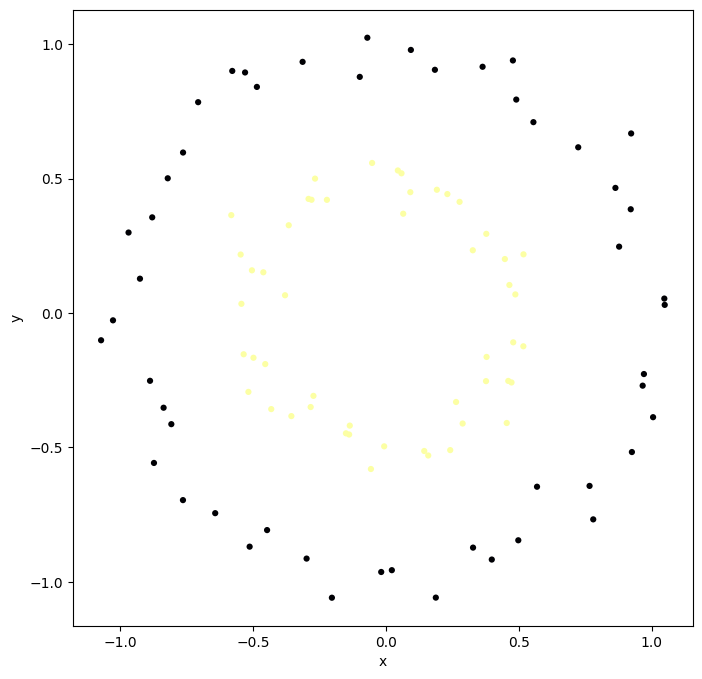

In [16]:
xy_df.plot.scatter(x="x", y="y", c="class", cmap="inferno", edgecolors=(1,0,0,0), colorbar=False, figsize=(8,8))

In [17]:
import matplotlib.pyplot as plt

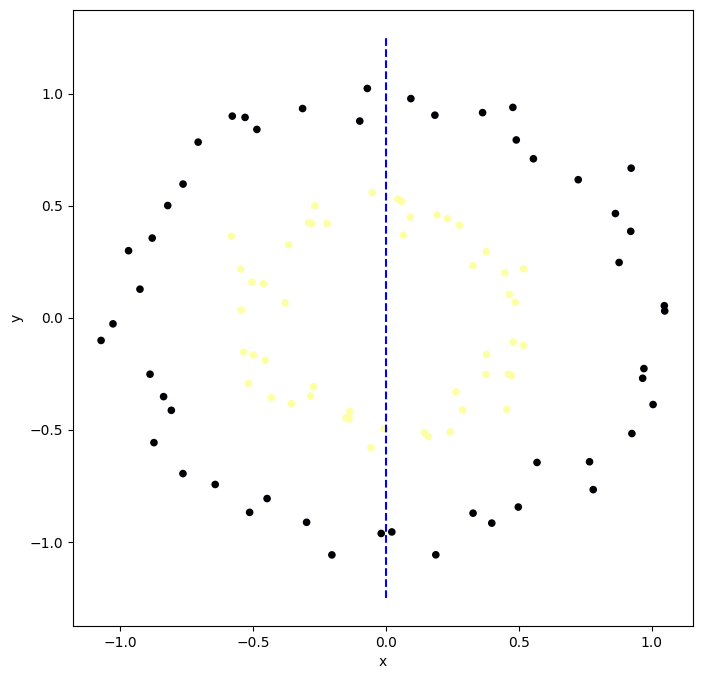

In [28]:
xy_df.plot.scatter(x="x", y="y", c="class", colorbar=False, figsize=(8,8), cmap="inferno")
plt.plot([0, 0], [-1.25, 1.25], "b--")

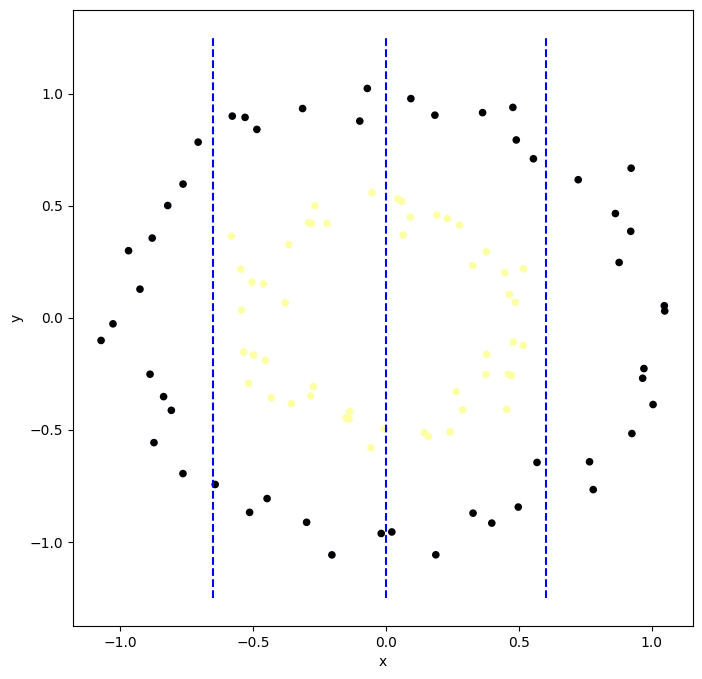

In [29]:
xy_df.plot.scatter(x="x", y="y", c="class", colorbar=False, figsize=(8,8), cmap="inferno")
plt.plot([0, 0], [-1.25, 1.25], "b--")
plt.plot([-0.65, -0.65], [-1.25, 1.25], "b--")
plt.plot([0.6, 0.6], [-1.25, 1.25], "b--")

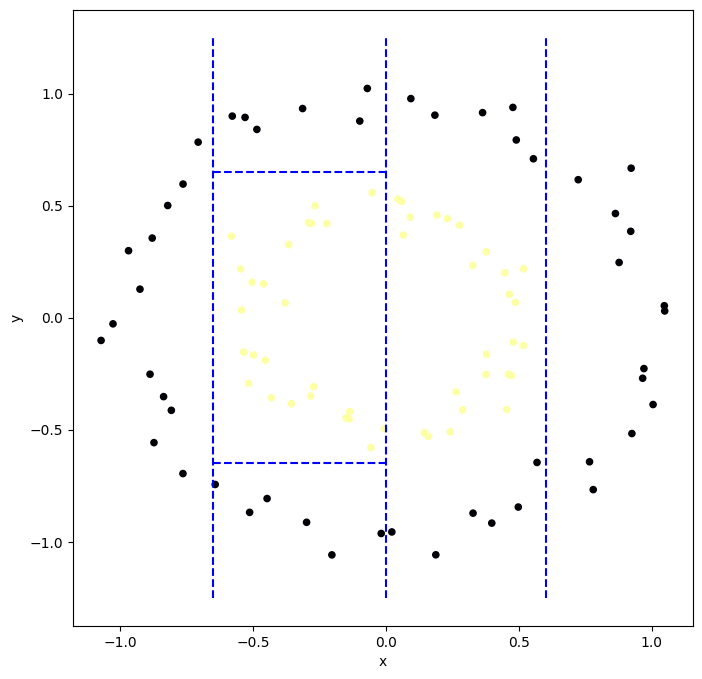

In [32]:
xy_df.plot.scatter(x="x", y="y", c="class", colorbar=False, figsize=(8,8), cmap="inferno")
plt.plot([0, 0], [-1.25, 1.25], "b--")          # x <= 0
plt.plot([-0.65, -0.65], [-1.25, 1.25], "b--")  # x <= -0.65
plt.plot([0.6, 0.6], [-1.25, 1.25], "b--")      # x <= 0.6

# plt.plot([-1.25, 1.25], [0, 0], "b--")
plt.plot([-0.65, 0], [-0.65, -0.65],  "b--")      # y <= -0.65
plt.plot([-0.65, 0], [0.65, 0.65],  "b--")        # y <=  0.65

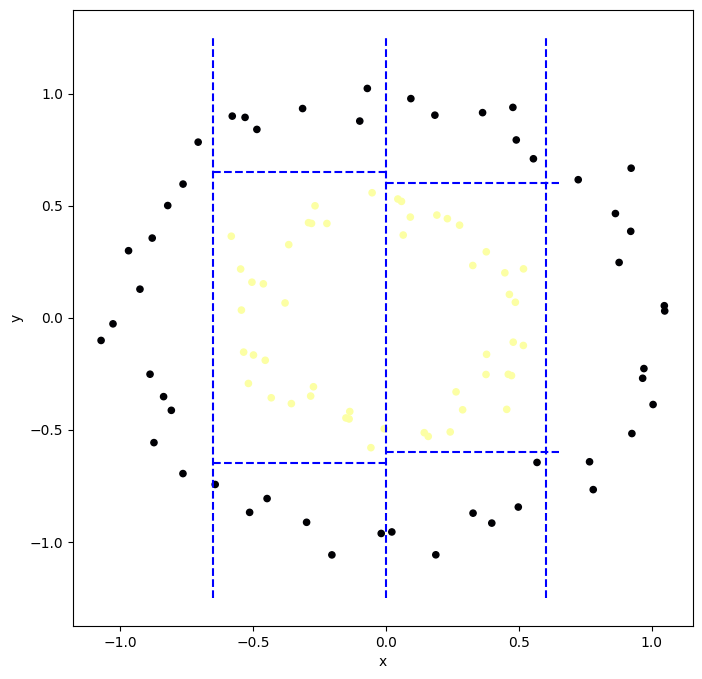

In [34]:
xy_df.plot.scatter(x="x", y="y", c="class", colorbar=False, figsize=(8,8), cmap="inferno")
plt.plot([0, 0], [-1.25, 1.25], "b--")          # x <= 0
plt.plot([-0.65, -0.65], [-1.25, 1.25], "b--")  # x <= -0.65
plt.plot([0.6, 0.6], [-1.25, 1.25], "b--")      # x <= 0.6

plt.plot([-0.65, 0], [-0.65, -0.65],  "b--")      # y <= -0.65
plt.plot([-0.65, 0], [0.65, 0.65],  "b--")        # y <=  0.65

plt.plot([0, 0.65], [-0.60, -0.60],  "b--")      # y <= -0.65
plt.plot([0, 0.65], [0.60, 0.60],  "b--")

Finalnie, stworzyliśmy kolejno szereg zagnieżdżonych warunków, które dzielą naszą przestrzeń na 8 podgrup o różnej wielkości i przypisują odpowiednią klasę. Czy granice decyzyjne stworzonego klasyfikatora są najlepszse z możliwych? Raczej nie, ale staramy się tylko przybliżać pewną funkcję, której nie znamy i jest to na pewno wystarczająco dobre przybliżenie do pewnych zastosowań.

### Wizualizacja stworzonego drzewa
Możemy zwizualizować nasze drzewo decyzyjne - na razie ręcznie, ale już niedługo poznamy narzędzia, które zautomatyzują ten proces.

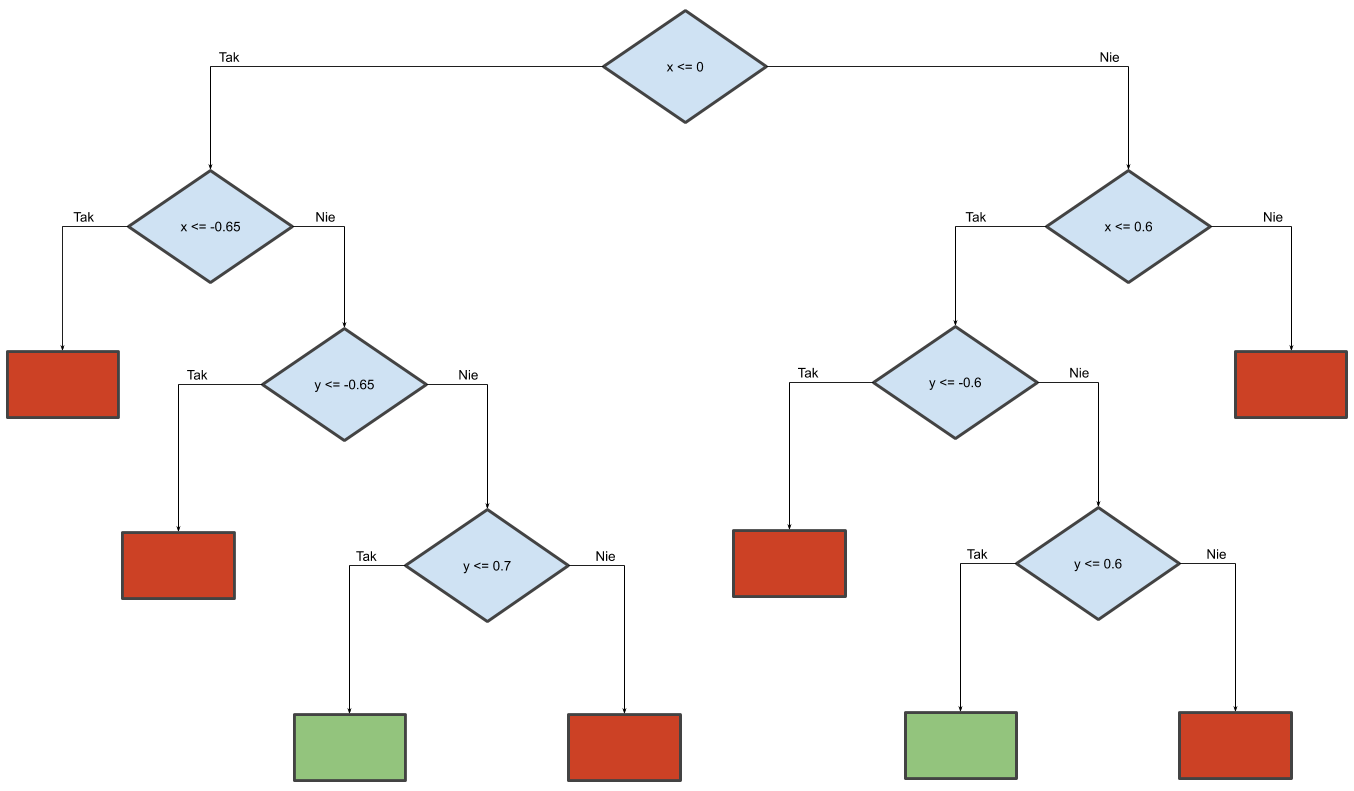

In [36]:
from IPython.display import Image
Image("../data/circles-tree.png")

Stworzenie powyższej struktury było możliwe głównie dlatego, że graficznie określiliśmy zgrubne granice podziałów i taki scenariusz raczej nie wydarzy się w rzeczywistym świecie. Im więcej cech oraz obserwacji, tym trudniej nam zrobić to ręcznie. Dodatkowo, w typowym przypadku nie będziemy zazwyczaj w stanie idealnie odseparować przykładów z różnych klas. Wtedy też wybór odpowiedniej klasy odbywał się będzie na zasadzie głosowania - wygrywa ta klasa, która ma najwięcej przykładów w liściu, w którym znalazł się nasz przykład.

### Typowy proces nauczania
Podczas tworzenia drzewa napotykamy dwa zasadnicze problemy:
* Której cechy użyć w danym momencie do podziału?
* Jak ustawić próg danej cechy, aby podział był optymalny?


Znalezienie optymalnego drzewa jest problemem NP-zupełnym i z tego powodu stosuje się pewne heurystyki polegające na podejmowaniu decyzji, które są lokalnie tylko optymalne.